In [7]:
import pandas as pd
data = pd.read_excel("data/RetailerHistoricalSalesData.xls", sheet_name = "Data Analysis", skiprows = 4)
data.head(17)

,Week,hand,Price,Sales
0,1,2000.0,100.0,57.0
1,2,1943.0,100.0,98.0
2,3,1845.0,100.0,55.0
3,4,1790.0,100.0,41.0
4,5,1749.0,100.0,60.0
5,6,1689.0,100.0,39.0
6,7,1650.0,90.0,106.0
7,8,1544.0,90.0,55.0
8,9,1489.0,90.0,64.0
9,10,1425.0,90.0,43.0


In [40]:
formated_data = pd.DataFrame()
row = 0
for i in range(15):
    aux = data.loc[row:(row + 15)]
    aux["Week"] = aux.Week.astype(int)
    aux["item"] = i
    aux.rename(columns = {"hand": "Qty"}, inplace = True)
    formated_data = formated_data.append(aux)
    row += 17
formated_data

<ipython-input-40-71bf9d901c8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["Week"] = aux.Week.astype(int)
<ipython-input-40-71bf9d901c8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["item"] = i
C:\Users\eloyc\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Week,Qty,Price,Sales,item
0,1,2000.0,100.0,57.0,0
1,2,1943.0,100.0,98.0,0
2,3,1845.0,100.0,55.0,0
3,4,1790.0,100.0,41.0,0
4,5,1749.0,100.0,60.0,0
...,...,...,...,...,...
249,12,1142.0,60.0,152.0,14
250,13,990.0,60.0,188.0,14
251,14,802.0,60.0,244.0,14
252,15,558.0,60.0,169.0,14


In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\eloyc\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


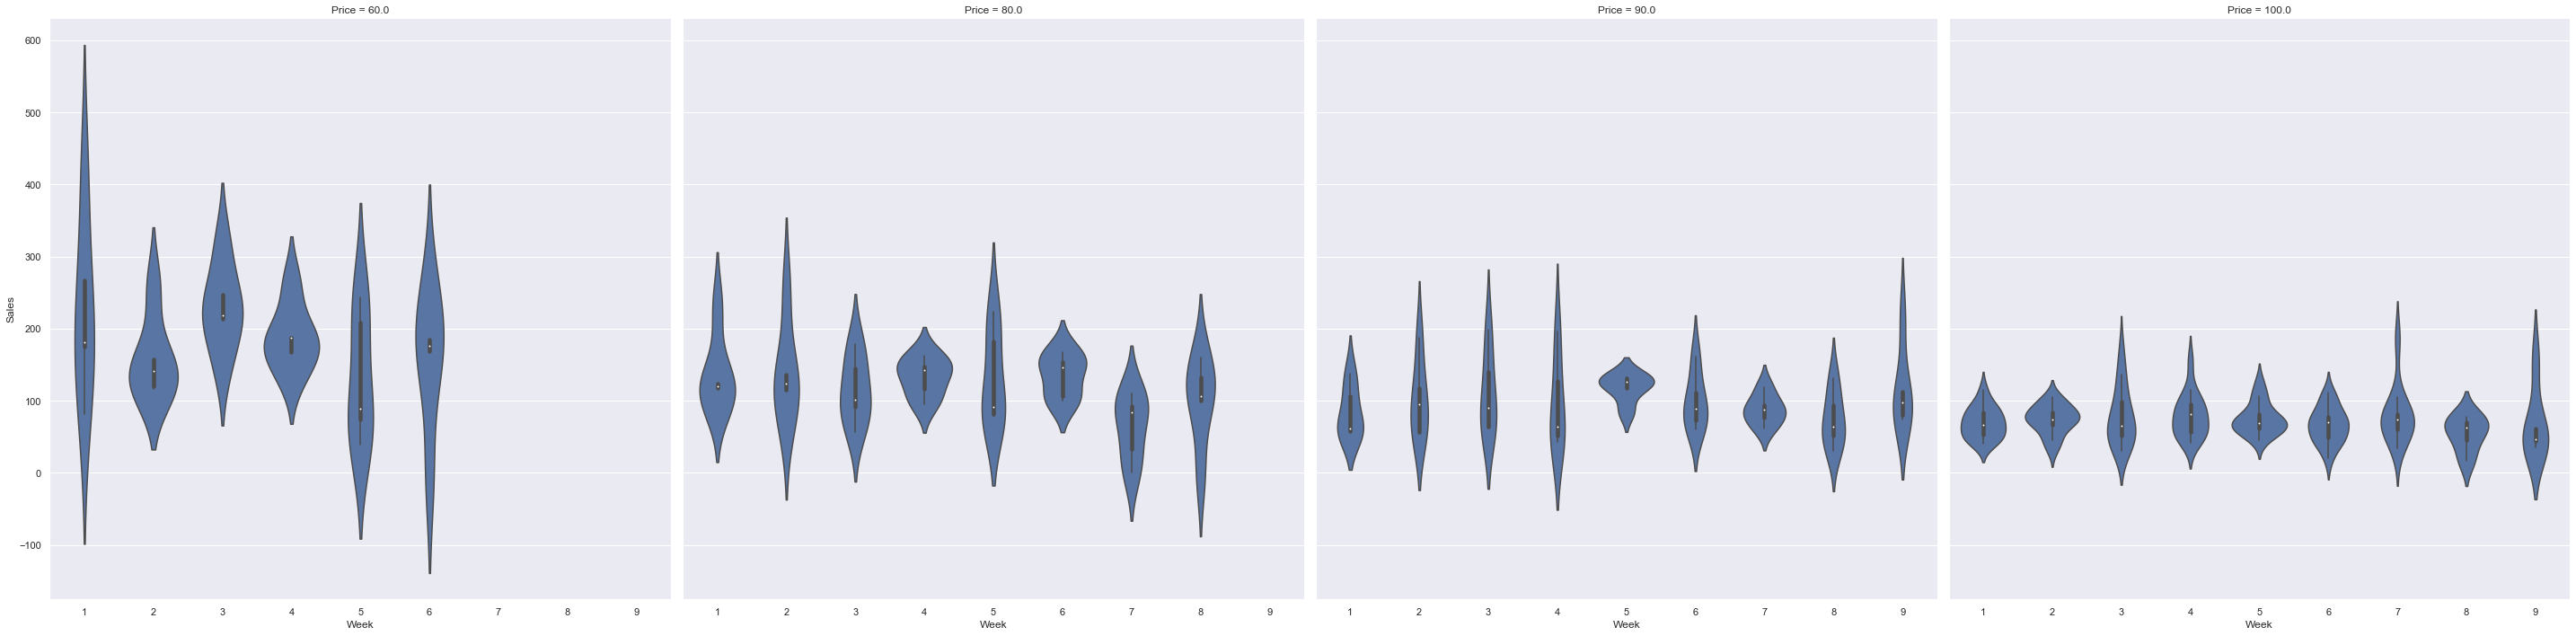

In [34]:
plot = sns.FacetGrid(formated_data, col="Price", height = 10)
plot.map(sns.violinplot, "Week", "Sales")

C:\Users\eloyc\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\eloyc\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


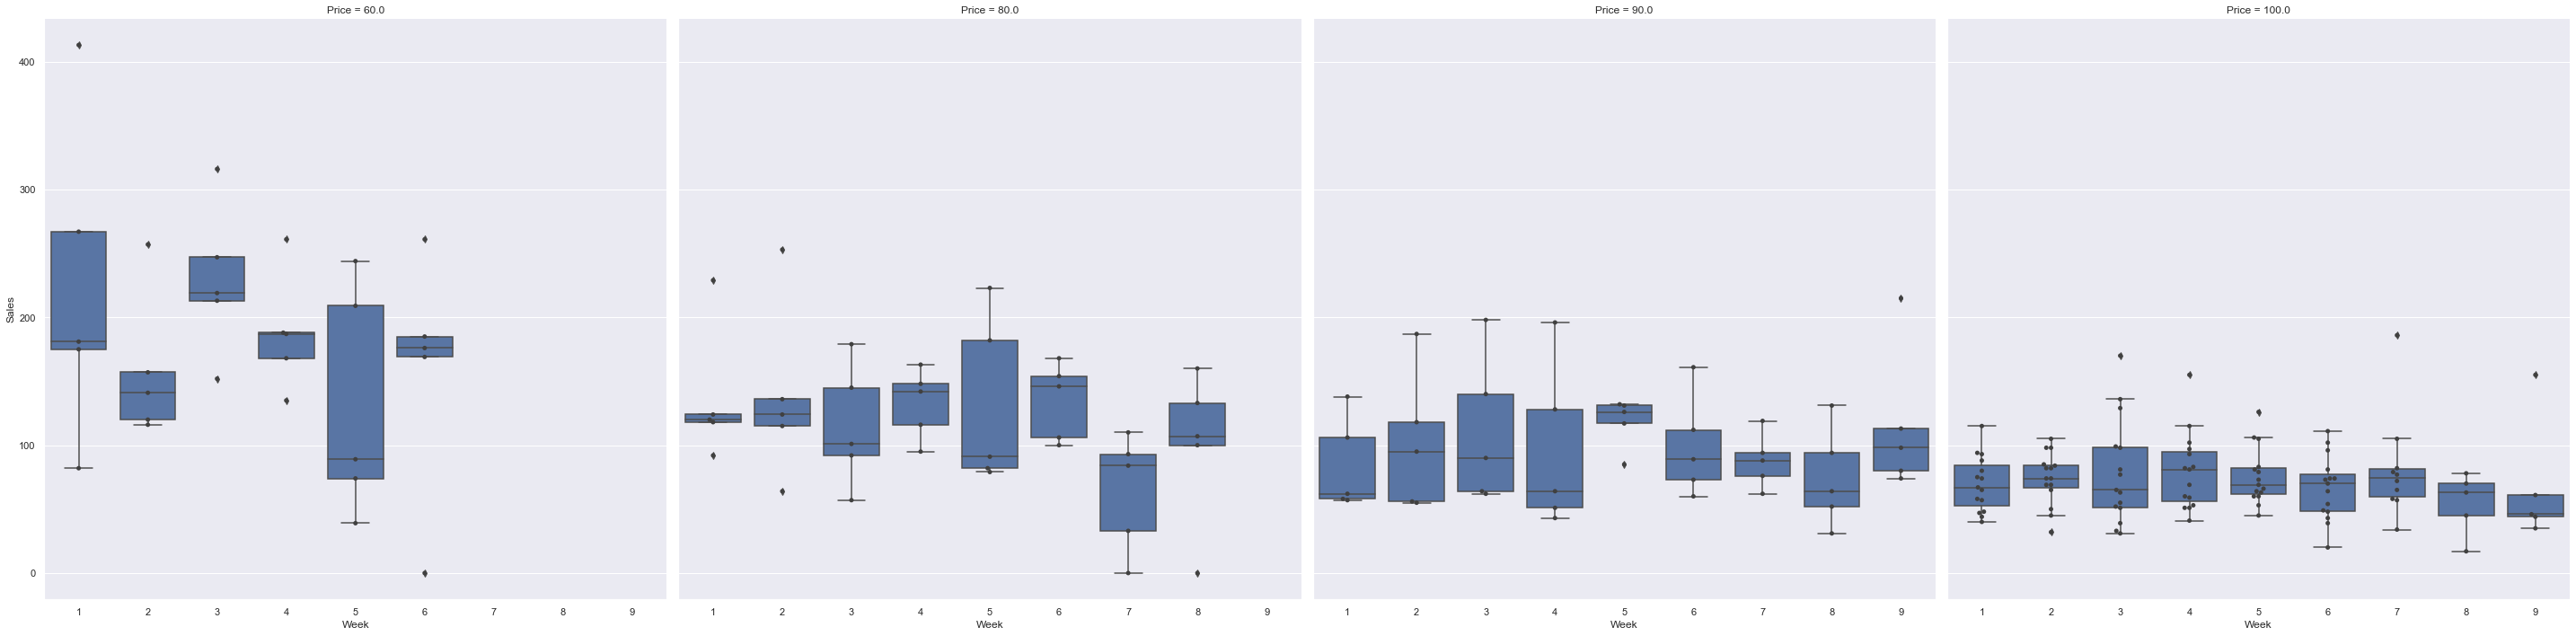

In [35]:
plot = sns.FacetGrid(formated_data, col="Price", height = 10)
plot.map(sns.boxplot, "Week", "Sales")
plot.map(sns.swarmplot, "Week", "Sales", color = ".25")

<AxesSubplot:xlabel='Price', ylabel='Sales'>

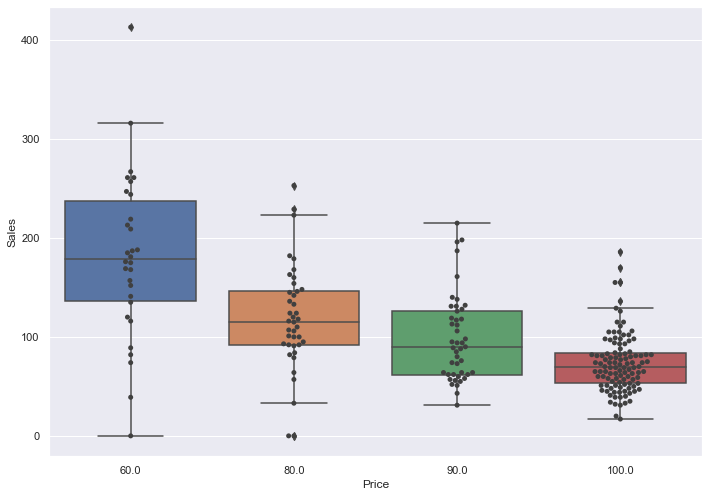

In [36]:
sns.boxplot(x = formated_data.Price, y = formated_data.Sales)
sns.swarmplot(x = formated_data.Price, y = formated_data.Sales, color = ".25")

Proposals:

* Causal model (log - log lineal regression)

* Get avg demand for each price.

* Linear model based on price.

* Linear model based on weeks for each price.

In [41]:
# Droping 0 Sales data
formated_data.loc[formated_data.Sales > 0].to_csv("data/formated_data.csv", index = False)

In [43]:
data = pd.read_csv("data/formated_data.csv")
data.head()

,Week,Qty,Price,Sales,item
0,1,2000.0,100.0,57.0,0
1,2,1943.0,100.0,98.0,0
2,3,1845.0,100.0,55.0,0
3,4,1790.0,100.0,41.0,0
4,5,1749.0,100.0,60.0,0


In [44]:
data.groupby("Price").Sales.mean()

Price
60.0     187.620690
80.0     125.368421
90.0      98.777778
100.0     73.527273
Name: Sales, dtype: float64